In [1]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

pio.renderers.default = 'iframe'

pio.templates['ck_template'] = go.layout.Template(
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font=dict(family='Calibri Light'),
    layout_title_font = dict(family='Calibri'),
    layout_hoverlabel_font = dict(family='Calibri Light')
)

pio.templates.default = 'ck_template+gridon'

In [2]:
#import necessary packages
import numpy as np
import pandas as pd

train_in_file = 'C:/Users/ZhangLockerberg/Downloads/Kaggle/train.csv'
test_in_file = 'C:/Users/ZhangLockerberg/Downloads/Kaggle/test.csv'
data = pd.read_csv(train_in_file)
test = pd.read_csv(test_in_file)

In [3]:
data.describe(include='all')

PassengerId HomePlanet CryoSleep    Cabin  Destination          Age    VIP   RoomService     FoodCourt  ShoppingMall           Spa        VRDeck                Name Transported
count         8693       8492      8476     8494         8511  8514.000000   8490   8512.000000   8510.000000   8485.000000   8510.000000   8505.000000                8493        8693
unique        8693          3         2     6560            3          NaN      2           NaN           NaN           NaN           NaN           NaN                8473           2
top        5167_01      Earth     False  G/734/S  TRAPPIST-1e          NaN  False           NaN           NaN           NaN           NaN           NaN  Elaney Webstephrey        True
freq             1       4602      5439        8         5915          NaN   8291           NaN           NaN           NaN           NaN           NaN                   2        4378
mean           NaN        NaN       NaN      NaN          NaN    28.827930    NaN    224.687617    458.077203    173.729169    311.138778    304.854791                 NaN         NaN
std            NaN        NaN       NaN      NaN          NaN    14.489021    NaN    666.717663   1611.489240    604.696458   1136.705535   1145.717189                 NaN         NaN
min            NaN        NaN       NaN      NaN          NaN     0.000000    NaN      0.000000      0.000000      0.000000      0.000000      0.000000                 NaN         NaN
25%            NaN        NaN       NaN      NaN          NaN    19.000000    NaN      0.000000      0.000000      0.000000      0.000000      0.000000                 NaN         NaN
50%            NaN        NaN       NaN      NaN          NaN    27.000000    NaN      0.000000      0.000000      0.000000      0.000000      0.000000                 NaN         NaN
75%            NaN        NaN       NaN      NaN          NaN    38.000000    NaN     47.000000     76.000000     27.000000     59.000000     46.000000                 NaN         NaN
max            NaN        NaN       NaN      NaN          NaN    79.000000    NaN  14327.000000  29813.000000  23492.000000  22408.000000  24133.000000                 NaN         NaN

In [4]:
# looks like age<17 are unlikely to be VIPs, but that yields to nothing valuable as we classify most of nans in VIP as False
import plotly.express as px
df = data.loc[(data.Age.isnull() == False)&(data.VIP.isnull() == False)]
fig = px.histogram(df, x='Age', color='VIP')
fig.show()

In [5]:
# children <= 12 years old are barred from consumption
import plotly.express as px
data['TotalSpended'] = data['RoomService'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa'] + data['VRDeck']
test['TotalSpended'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']
df = data.loc[(data.Age.isnull() == False)&(data.TotalSpended.isnull() == False)]
fig = px.histogram(df, x='Age', color='TotalSpended')
fig.show()

In [6]:
# The accumulative values suits bell curve. Why not propagating the nans with neighboring values?
import plotly.express as px
import plotly.graph_objects as go

df = data.groupby('Age').sum().reset_index()

x0 = df.RoomService
x1 = df.FoodCourt
x2 = df.ShoppingMall
x3 = df.Spa
x4 = df.VRDeck
x5 = df.TotalSpended

fig = go.Figure()
fig.add_trace(go.Line(y=x0, name='RoomService'))
fig.add_trace(go.Line(y=x1, name='FoodCourt'))
fig.add_trace(go.Line(y=x2, name='ShoppingMall'))
fig.add_trace(go.Line(y=x3, name='Spa'))
fig.add_trace(go.Line(y=x4, name='VRDeck'))
fig.add_trace(go.Line(y=x5, name='TotalSpended'))

fig.show()

In [7]:
df2 = data.loc[(data.Age.isnull() == False)&(data.TotalSpended.isnull() == True)]
df2.fillna(method='bfill', inplace=True)
df2 = df2.iloc[:-1, :]
df2

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa   VRDeck                Name  Transported  TotalSpended
7        0006_02      Earth      True     G/0/S    TRAPPIST-1e  28.0  False          0.0        0.0           0.0     0.0      0.0  Candra Jacostaffey         True           NaN
10       0008_02     Europa      True     B/1/P    TRAPPIST-1e  34.0  False          0.0        0.0           0.0     0.0      0.0      Altardr Flatic         True           NaN
16       0014_01       Mars     False     F/3/P    55 Cancri e  27.0  False       1286.0      122.0           0.0     0.0      0.0         Flats Eccle        False           NaN
23       0020_03      Earth      True     E/0/S    55 Cancri e  29.0  False          0.0        0.0           0.0     0.0      0.0  Mollen Mcfaddennon        False           NaN
25       0020_05      Earth      True     E/0/S  PSO J318.5-22   1.0  False          0.0        0.0           0.0     0.0      0.0     Mael Brantuarez        False           NaN
28       0024_01     Europa      True     C/2/S    TRAPPIST-1e  62.0  False          0.0        0.0        1750.0     0.0      0.0     Penton Fullided         True           NaN
35       0031_03       Mars     False     F/9/P    TRAPPIST-1e  20.0  False          0.0        0.0        1750.0   990.0      0.0        Dontch Datie         True           NaN
40       0039_01      Earth      True     G/1/P    55 Cancri e  30.0  False          0.0        0.0           0.0     0.0      0.0   Jorgie Batthewitt        False           NaN
48       0050_01      Earth     False     E/1/S    55 Cancri e  35.0  False        790.0        0.0           0.0     0.0      0.0         Sony Lancis        False           NaN
59       0064_02      Earth      True     E/3/S    TRAPPIST-1e  33.0  False          0.0        0.0           0.0     0.0      0.0         Colatz Keen         True           NaN
83       0091_01      Earth      True    G/16/S    TRAPPIST-1e  26.0  False          0.0        0.0           0.0     0.0      0.0     Deanne Yorkland         True           NaN
86       0092_02      Earth      True     G/9/P    TRAPPIST-1e   0.0  False          0.0        0.0           0.0     0.0      0.0        Stald Hewson         True           NaN
95       0103_01      Earth     False    F/24/S    TRAPPIST-1e  24.0  False          0.0        0.0           0.0     0.0     17.0      Arlen Mclainez         True           NaN
111      0115_01       Mars      True    F/24/P    TRAPPIST-1e  26.0  False          0.0        0.0           0.0     0.0      0.0           Rohs Pead         True           NaN
115      0120_01       Mars      True    F/25/P    TRAPPIST-1e  24.0  False          0.0        0.0           0.0     0.0      0.0          Bees Sacre         True           NaN
122      0129_01      Earth      True    G/22/S  PSO J318.5-22  22.0  False          0.0        0.0          97.0     0.0      0.0         Race Fowles         True           NaN
132      0141_01       Mars     False    F/30/P    TRAPPIST-1e  31.0  False         50.0        0.0          97.0     0.0      0.0        Pyrohs Harte        False           NaN
143      0164_01      Earth     False    G/28/S    TRAPPIST-1e  57.0  False         50.0     1688.0           0.0  1072.0    135.0     Fany Hutchinton         True           NaN
170      0193_02       Mars     False    F/41/P    TRAPPIST-1e  23.0  False          0.0        0.0           8.0  1072.0      0.0           Frook Raf        False           NaN
186      0210_01      Earth      True     D/6/P    55 Cancri e  24.0  False          0.0        0.0           0.0     0.0      0.0      Arraid Inicont         True           NaN
199      0220_04      Earth     False    E/10/P    TRAPPIST-1e  25.0  False        122.0       84.0           0.0     0.0      0.0       Dont Wilsoney        False           NaN
218      0232_01      Earth      True    G/36/S  PSO J318.5-22  27.0  False          0.0 

In [8]:
# check sample results
df2 = df2.groupby('Age').sum().reset_index()

x0 = df2.RoomService
x1 = df2.FoodCourt
x2 = df2.ShoppingMall
x3 = df2.Spa
x4 = df2.VRDeck

fig = go.Figure()
fig.add_trace(go.Line(y=x0, name='RoomService'))
fig.add_trace(go.Line(y=x1, name='FoodCourt'))
fig.add_trace(go.Line(y=x2, name='ShoppingMall'))
fig.add_trace(go.Line(y=x3, name='Spa'))
fig.add_trace(go.Line(y=x4, name='VRDeck'))

fig.show()

In [9]:
data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  Transported  TotalSpended
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy        False           0.0
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False        109.0        9.0          25.0   549.0    44.0       Juanna Vines         True         736.0
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True         43.0     3576.0           0.0  6715.0    49.0      Altark Susent        False       10383.0
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False          0.0     1283.0         371.0  3329.0   193.0       Solam Susent        False        5176.0
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False        303.0       70.0         151.0   565.0     2.0  Willy Santantines         True        1091.0

In [10]:
data[['id', 'num']] = data.PassengerId.str.split('_', -1, expand=True)
explore = data.PassengerId.str.split('_', -1, expand=True)
data_prep = pd.DataFrame()
data_prep[['id','cum']] = explore.groupby(0).count().reset_index()
data = pd.merge(data, data_prep, how='inner', on='id')
data['Status'] = 'empty'
data.loc[data.cum == 1, 'Status'] = 1
data.loc[data.cum != 1, 'Status'] = 0
# data.loc[data.cum == 2, 'Status'] = 'couple'
# data.loc[data.cum == 3, 'Status'] = 'family'
# data.loc[data.cum > 3, 'Status'] = 'tourist group'

test[['id', 'num']] = test.PassengerId.str.split('_', -1, expand=True)
test_explore = test.PassengerId.str.split('_', -1, expand=True)
test_prep = pd.DataFrame()
test_prep[['id','cum']] = test_explore.groupby(0).count().reset_index()
test = pd.merge(test, test_prep, how='inner', on='id')
test['Status'] = 'empty'
test.loc[test.cum == 1, 'Status'] = 1
test.loc[test.cum != 1, 'Status'] = 0
# test.loc[test.cum == 2, 'Status'] = 'couple'
# test.loc[test.cum == 3, 'Status'] = 'family'
# test.loc[test.cum > 3, 'Status'] = 'tourist group'

In [11]:
data

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall      Spa   VRDeck                Name  Transported  TotalSpended    id num  cum  Status
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False          0.0        0.0           0.0      0.0      0.0     Maham Ofracculy        False           0.0  0001  01    1       1
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False        109.0        9.0          25.0    549.0     44.0        Juanna Vines         True         736.0  0002  01    1       1
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True         43.0     3576.0           0.0   6715.0     49.0       Altark Susent        False       10383.0  0003  01    2       0
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False          0.0     1283.0         371.0   3329.0    193.0        Solam Susent        False        5176.0  0003  02    2       0
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False        303.0       70.0         151.0    565.0      2.0   Willy Santantines         True        1091.0  0004  01    1       1
5        0005_01      Earth     False     F/0/P  PSO J318.5-22  44.0  False          0.0      483.0           0.0    291.0      0.0   Sandie Hinetthews         True         774.0  0005  01    1       1
6        0006_01      Earth     False     F/2/S    TRAPPIST-1e  26.0  False         42.0     1539.0           3.0      0.0      0.0  Billex Jacostaffey         True        1584.0  0006  01    2       0
7        0006_02      Earth      True     G/0/S    TRAPPIST-1e  28.0  False          0.0        0.0           0.0      0.0      NaN  Candra Jacostaffey         True           NaN  0006  02    2       0
8        0007_01      Earth     False     F/3/S    TRAPPIST-1e  35.0  False          0.0      785.0          17.0    216.0      0.0       Andona Beston         True        1018.0  0007  01    1       1
9        0008_01     Europa      True     B/1/P    55 Cancri e  14.0  False          0.0        0.0           0.0      0.0      0.0      Erraiam Flatic         True           0.0  0008  01    3       0
10       0008_02     Europa      True     B/1/P    TRAPPIST-1e  34.0  False          0.0        0.0           NaN      0.0      0.0      Altardr Flatic         True           NaN  0008  02    3       0
11       0008_03     Europa     False     B/1/P    55 Cancri e  45.0  False         39.0     7295.0         589.0    110.0    124.0       Wezena Flatic         True        8157.0  0008  03    3       0
12       0009_01       Mars     False     F/1/P    TRAPPIST-1e  32.0  False         73.0        0.0        1123.0      0.0    113.0        Berers Barne         True        1309.0  0009  01    1       1
13       0010_01      Earth     False     G/1/S    TRAPPIST-1e  48.0  False        719.0        1.0          65.0      0.0     24.0      Reney Baketton        False         809.0  0010  01    1       1
14       0011_01      Earth     False     F/2/P    TRAPPIST-1e  28.0  False          8.0      974.0          12.0      2.0      7.0     Elle Bertsontry         True        1003.0  0011  01    1       1
15       0012_01      Earth     False       NaN    TRAPPIST-1e  31.0  False         32.0        0.0         876.0      0.0      0.0       Justie Pooles        False         908.0  0012  01    1       1
16       0014_01       Mars     False     F/3/P    55 Cancri e  27.0  False       1286.0      122.0           NaN      0.0      0.0         Flats Eccle        False           NaN  0014  01    1       1
17       0015_01      Earth     False     F/4/P    55 Cancri e  24.0  False          0.0        1.0           0.0      0.0    637.0     Carry Hughriend        False         638.0  0015  01    1       1
18       0016_01       Mars      True     F/5/P    TRAPPIST-1e  45.0  False          0.0        0.0           0.0      0.0      0.0          Alus Upead         True   

In [12]:
#check data shape
data.shape

(8693, 19)

In [13]:
#fill missing CryoSleep data with True for those not spending any money
#fill missing spenditure data of kids less than 12 with zero spending
data.loc[(data['CryoSleep'].isnull()) 
         & (data['TotalSpended'] <= 0), 'CryoSleep'] = True
test.loc[(test['CryoSleep'].isnull()) 
         & (test['TotalSpended'] <= 0), 'CryoSleep'] = True

data.loc[(data['FoodCourt' or 'RoomService'
            or 'ShoppingMall' or 'Spa' or 'VRDeck'].isnull()) 
         & (data['Age'] <= 12), ['FoodCourt','RoomService'
            , 'ShoppingMall', 'Spa','VRDeck']] = 0
test.loc[(test['FoodCourt' or 'RoomService'
            or 'ShoppingMall' or 'Spa' or 'VRDeck'].isnull()) 
         & (test['Age'] <= 12), ['FoodCourt','RoomService'
            , 'ShoppingMall', 'Spa','VRDeck']] = 0

In [14]:
#spending status
data['Consumption'] = 0
data.loc[data.TotalSpended>0, 'Consumption'] = 1
data.loc[data.TotalSpended<=0, 'Consumption'] = 0

test['Consumption'] = 0
test.loc[test.TotalSpended>0, 'Consumption'] = 1
test.loc[test.TotalSpended<=0, 'Consumption'] = 0

In [15]:
#fill nan with neareast numbers
data = data.fillna(method='bfill')
test = test.fillna(method='bfill')

In [16]:
#check decretized candidate data
print(data.HomePlanet.unique(),
      data.Cabin.unique(),
      data.Destination.unique(), sep='\n')

['Europa' 'Earth' 'Mars']
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


In [17]:
#looking for an appropriate option for missing values
from IPython.display import display
display(data.groupby('HomePlanet').count())
display(data.groupby('Destination').count())

PassengerId  CryoSleep  Cabin  Destination   Age   VIP  RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  Transported  TotalSpended    id   num   cum  Status  Consumption
HomePlanet                                                                                                                                                                                    
Earth              4697       4697   4697         4697  4697  4697         4697       4697          4697  4697    4697  4697         4697          4697  4697  4697  4697    4697         4697
Europa             2184       2184   2184         2184  2184  2184         2184       2184          2184  2184    2184  2184         2184          2184  2184  2184  2184    2184         2184
Mars               1812       1812   1812         1812  1812  1812         1812       1812          1812  1812    1812  1812         1812          1812  1812  1812  1812    1812         1812

PassengerId  HomePlanet  CryoSleep  Cabin   Age   VIP  RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  Transported  TotalSpended    id   num   cum  Status  Consumption
Destination                                                                                                                                                                                     
55 Cancri e           1836        1836       1836   1836  1836  1836         1836       1836          1836  1836    1836  1836         1836          1836  1836  1836  1836    1836         1836
PSO J318.5-22          816         816        816    816   816   816          816        816           816   816     816   816          816           816   816   816   816     816          816
TRAPPIST-1e           6041        6041       6041   6041  6041  6041         6041       6041          6041  6041    6041  6041         6041          6041  6041  6041  6041    6041         6041

In [18]:
#fill nans with mode
data.HomePlanet.fillna('Earth', inplace=True)
data.Destination.fillna('TRAPPIST-1e', inplace=True)

test.HomePlanet.fillna('Earth', inplace=True)
test.Destination.fillna('TRAPPIST-1e', inplace=True)

In [19]:
#check result
print(data.HomePlanet.unique(),
      data.Cabin.unique(),
      data.Destination.unique(), sep='\n')

['Europa' 'Earth' 'Mars']
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


In [20]:
#zoom in to see cabin
len(data.Cabin.unique()), len(data.Cabin.unique()) == len(data)

(6560, False)

In [21]:
#split cabin into multiple columns
data[['A','B','C']] = data.Cabin.str.split('/', -1, expand=True)
test[['A','B','C']] = test.Cabin.str.split('/', -1, expand=True)

In [22]:
#check mode
display(data.groupby('A').count())
display(data.groupby('B').count())
display(data.groupby('C').count())

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age   VIP  RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  Transported  TotalSpended    id   num   cum  Status  Consumption     B     C
A                                                                                                                                                                                                            
A          262         262        262    262          262   262   262          262        262           262   262     262   262          262           262   262   262   262     262          262   262   262
B          797         797        797    797          797   797   797          797        797           797   797     797   797          797           797   797   797   797     797          797   797   797
C          764         764        764    764          764   764   764          764        764           764   764     764   764          764           764   764   764   764     764          764   764   764
D          488         488        488    488          488   488   488          488        488           488   488     488   488          488           488   488   488   488     488          488   488   488
E          894         894        894    894          894   894   894          894        894           894   894     894   894          894           894   894   894   894     894          894   894   894
F         2868        2868       2868   2868         2868  2868  2868         2868       2868          2868  2868    2868  2868         2868          2868  2868  2868  2868    2868         2868  2868  2868
G         2614        2614       2614   2614         2614  2614  2614         2614       2614          2614  2614    2614  2614         2614          2614  2614  2614  2614    2614         2614  2614  2614
T            6           6          6      6            6     6     6            6          6             6     6       6     6            6             6     6     6     6       6            6     6     6

PassengerId  HomePlanet  CryoSleep  Cabin  Destination  Age  VIP  RoomService  FoodCourt  ShoppingMall  Spa  VRDeck  Name  Transported  TotalSpended  id  num  cum  Status  Consumption   A   C
B                                                                                                                                                                                                    
0              18          18         18     18           18   18   18           18         18            18   18      18    18           18            18  18   18   18      18           18  18  18
1              15          15         15     15           15   15   15           15         15            15   15      15    15           15            15  15   15   15      15           15  15  15
10             12          12         12     12           12   12   12           12         12            12   12      12    12           12            12  12   12   12      12           12  12  12
100            12          12         12     12           12   12   12           12         12            12   12      12    12           12            12  12   12   12      12           12  12  12
1000            6           6          6      6            6    6    6            6          6             6    6       6     6            6             6   6    6    6       6            6   6   6
1001            3           3          3      3            3    3    3            3          3             3    3       3     3            3             3   3    3    3       3            3   3   3
1002            6           6          6      6            6    6    6            6          6             6    6       6     6            6             6   6    6    6       6            6   6   6
1003            2           2          2      2            2    2    2            2          2             2    2       2     2            2             2   2    2    2       2            2   2   2
1004            3           3          3      3            3    3    3            3          3             3    3       3     3            3             3   3    3    3       3            3   3   3
1005            2           2          2      2            2    2    2            2          2             2    2       2     2            2             2   2    2    2       2            2   2   2
1006            3           3          3      3            3    3    3            3          3             3    3       3     3            3             3   3    3    3       3            3   3   3
1007            4           4          4      4            4    4    4            4          4             4    4       4     4            4             4   4    4    4       4            4   4   4
1008            3           3          3      3            3    3    3            3          3             3    3       3     3            3             3   3    3    3       3            3   3   3
1009            3           3          3      3            3    3    3            3          3             3    3       3     3            3             3   3    3    3       3            3   3   3
101            12          12         12     12           12   12   12           12         12            12   12      12    12           12            12  12   12   12      12           12  12  12
1010            3           3          3      3            3    3    3            3          3             3    3       3     3            3             3   3    3    3       3            3   3   3
1011            2           2          2      2            2    2    2            2          2             2    2       2     2            2             2   2    2    2       2            2   2   2
1012            3           3          3      3            3    3    3            3          3             3    3       3     3            3             3   3    3    3       3            3   3   3
1013            3           3          3      

PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age   VIP  RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  Transported  TotalSpended    id   num   cum  Status  Consumption     A     B
C                                                                                                                                                                                                            
P         4308        4308       4308   4308         4308  4308  4308         4308       4308          4308  4308    4308  4308         4308          4308  4308  4308  4308    4308         4308  4308  4308
S         4385        4385       4385   4385         4385  4385  4385         4385       4385          4385  4385    4385  4385         4385          4385  4385  4385  4385    4385         4385  4385  4385

In [23]:
#fill nan with mode
data.A.fillna('F', inplace=True)
data.B.fillna(0, inplace=True)
data.C.fillna('S', inplace=True)

test.A.fillna('F', inplace=True)
test.B.fillna(0, inplace=True)
test.C.fillna('S', inplace=True)

In [24]:
#check results
print(data.A.unique(), data.B.unique(), data.C.unique())

['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T'] ['0' '1' '2' ... '1892' '1893' '1894'] ['P' 'S']


In [25]:
#view data
data.head()

PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  Transported  TotalSpended    id num  cum  Status  Consumption  A  B  C
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy        False           0.0  0001  01    1       1            0  B  0  P
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False        109.0        9.0          25.0   549.0    44.0       Juanna Vines         True         736.0  0002  01    1       1            1  F  0  S
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True         43.0     3576.0           0.0  6715.0    49.0      Altark Susent        False       10383.0  0003  01    2       0            1  A  0  S
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  33.0  False          0.0     1283.0         371.0  3329.0   193.0       Solam Susent        False        5176.0  0003  02    2       0            1  A  0  S
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  16.0  False        303.0       70.0         151.0   565.0     2.0  Willy Santantines         True        1091.0  0004  01    1       1            1  F  1  S

In [26]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'TotalSpended', 'id', 'num', 'cum', 'Status',
       'Consumption', 'A', 'B', 'C'],
      dtype='object')

In [27]:
#get necessary columns
labels = data.Transported
data = data[['HomePlanet', 'CryoSleep', 'Destination', 'Age','Consumption',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','TotalSpended',
        'A', 'B', 'C']]

test = test[['HomePlanet', 'CryoSleep', 'Destination', 'Age','Consumption',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpended',
        'A', 'B', 'C']]

In [28]:
#view data
display(data)

HomePlanet  CryoSleep    Destination   Age  Consumption  RoomService  FoodCourt  ShoppingMall      Spa   VRDeck  TotalSpended  A     B  C
0        Europa      False    TRAPPIST-1e  39.0            0          0.0        0.0           0.0      0.0      0.0           0.0  B     0  P
1         Earth      False    TRAPPIST-1e  24.0            1        109.0        9.0          25.0    549.0     44.0         736.0  F     0  S
2        Europa      False    TRAPPIST-1e  58.0            1         43.0     3576.0           0.0   6715.0     49.0       10383.0  A     0  S
3        Europa      False    TRAPPIST-1e  33.0            1          0.0     1283.0         371.0   3329.0    193.0        5176.0  A     0  S
4         Earth      False    TRAPPIST-1e  16.0            1        303.0       70.0         151.0    565.0      2.0        1091.0  F     1  S
5         Earth      False  PSO J318.5-22  44.0            1          0.0      483.0           0.0    291.0      0.0         774.0  F     0  P
6         Earth      False    TRAPPIST-1e  26.0            1         42.0     1539.0           3.0      0.0      0.0        1584.0  F     2  S
7         Earth       True    TRAPPIST-1e  28.0            0          0.0        0.0           0.0      0.0      0.0        1018.0  G     0  S
8         Earth      False    TRAPPIST-1e  35.0            1          0.0      785.0          17.0    216.0      0.0        1018.0  F     3  S
9        Europa       True    55 Cancri e  14.0            0          0.0        0.0           0.0      0.0      0.0           0.0  B     1  P
10       Europa       True    TRAPPIST-1e  34.0            0          0.0        0.0         589.0      0.0      0.0        8157.0  B     1  P
11       Europa      False    55 Cancri e  45.0            1         39.0     7295.0         589.0    110.0    124.0        8157.0  B     1  P
12         Mars      False    TRAPPIST-1e  32.0            1         73.0        0.0        1123.0      0.0    113.0        1309.0  F     1  P
13        Earth      False    TRAPPIST-1e  48.0            1        719.0        1.0          65.0      0.0     24.0         809.0  G     1  S
14        Earth      False    TRAPPIST-1e  28.0            1          8.0      974.0          12.0      2.0      7.0        1003.0  F     2  P
15        Earth      False    TRAPPIST-1e  31.0            1         32.0        0.0         876.0      0.0      0.0         908.0  F     3  P
16         Mars      False    55 Cancri e  27.0            0       1286.0      122.0           0.0      0.0      0.0         638.0  F     3  P
17        Earth      False    55 Cancri e  24.0            1          0.0        1.0           0.0      0.0    637.0         638.0  F     4  P
18         Mars       True    TRAPPIST-1e  45.0            0          0.0        0.0           0.0      0.0      0.0           0.0  F     5  P
19        Earth      False    TRAPPIST-1e   0.0            0          0.0        0.0           0.0      0.0      0.0           0.0  G     0  P
20        Earth      False    55 Cancri e  14.0            1        412.0        0.0           1.0      0.0    679.0        1092.0  F     6  P
21        Earth       True    TRAPPIST-1e   1.0            0          0.0        0.0           0.0      0.0      0.0           0.0  E     0  S
22        Earth       True    55 Cancri e  49.0            0          0.0        0.0           0.0      0.0      0.0           0.0  E     0  S
23        Earth       True    55 Cancri e  29.0            0          0.0        0.0           0.0      0.0      0.0           0.0  E     0  S
24        Earth      False    TRAPPIST-1e  10.0            0          0.0        0.0           0.0      0.0      0.0           0.0  E     0  S
25        Earth       True  PSO J318.5-22   1.0            0          0.0        0.0           0.0      0.0      0.0           0.0  E     0  S
26        Earth      False    TRAPPIST-1e   7.0            0          0.0        0.0           0.0      0.0      0.0           0.0  E     0  S
2

In [29]:
len(data.A.unique())

8

In [30]:
data.B = data.B.astype('int')
test.B = test.B.astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 14 columns):
HomePlanet      8693 non-null object
CryoSleep       8693 non-null bool
Destination     8693 non-null object
Age             8693 non-null float64
Consumption     8693 non-null int64
RoomService     8693 non-null float64
FoodCourt       8693 non-null float64
ShoppingMall    8693 non-null float64
Spa             8693 non-null float64
VRDeck          8693 non-null float64
TotalSpended    8693 non-null float64
A               8693 non-null object
B               8693 non-null int32
C               8693 non-null object
dtypes: bool(1), float64(7), int32(1), int64(1), object(4)
memory usage: 925.3+ KB


In [31]:
data = pd.get_dummies(data)
test = pd.get_dummies(test)

In [32]:
data.columns

Index(['CryoSleep', 'Age', 'Consumption', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpended', 'B',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'A_A', 'A_B', 'A_C', 'A_D', 'A_E', 'A_F',
       'A_G', 'A_T', 'C_P', 'C_S'],
      dtype='object')

In [33]:
#ready for preprocessing
data = data.astype('int')
test = test.astype('int')

In [34]:
#start preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X = scaler.fit_transform(data)
test = scaler.fit_transform(test)

In [35]:
X_train, y_train, X_test, y_test = train_test_split(X, labels, test_size = 0.25, shuffle=True)

It seems to be a binary classified structure, vaguely separated by the the middle blue line.

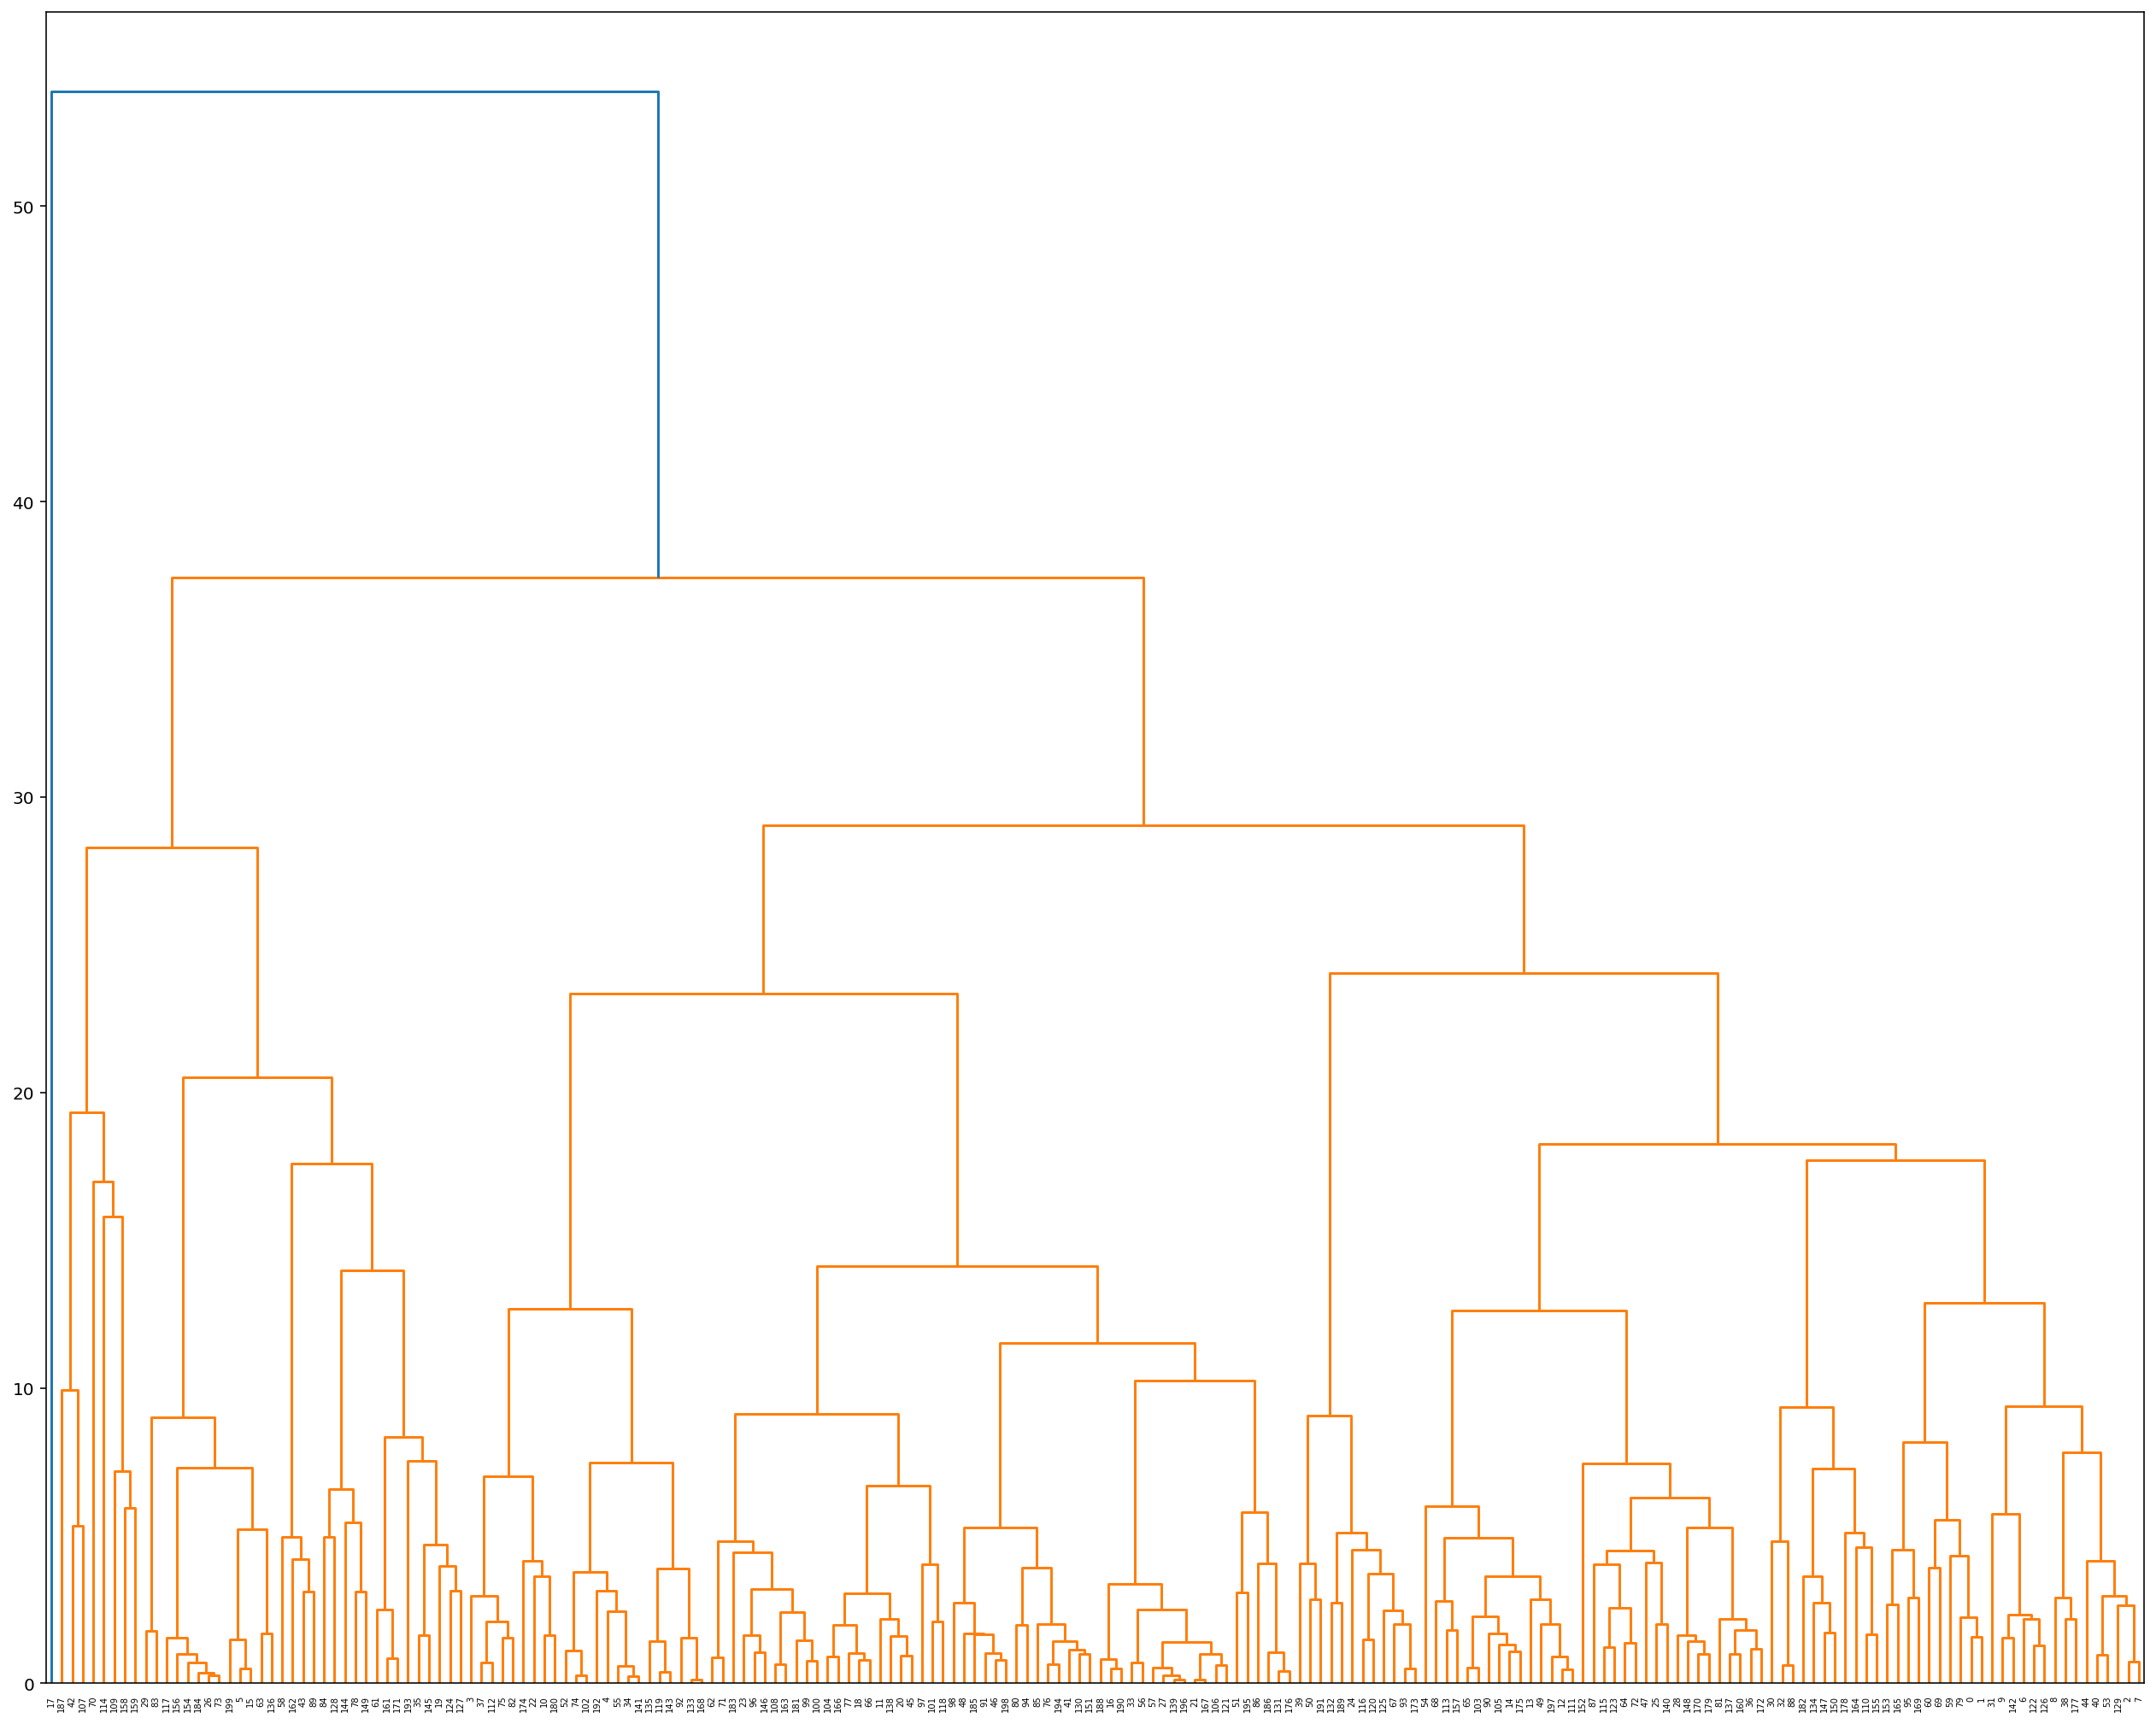

In [36]:
#using hierachical clustering to understand data
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 18))
linkage_type = 'ward'
linkage_matrix = linkage(X_train[:200, :], linkage_type)
dendrogram(linkage_matrix)
plt.show()

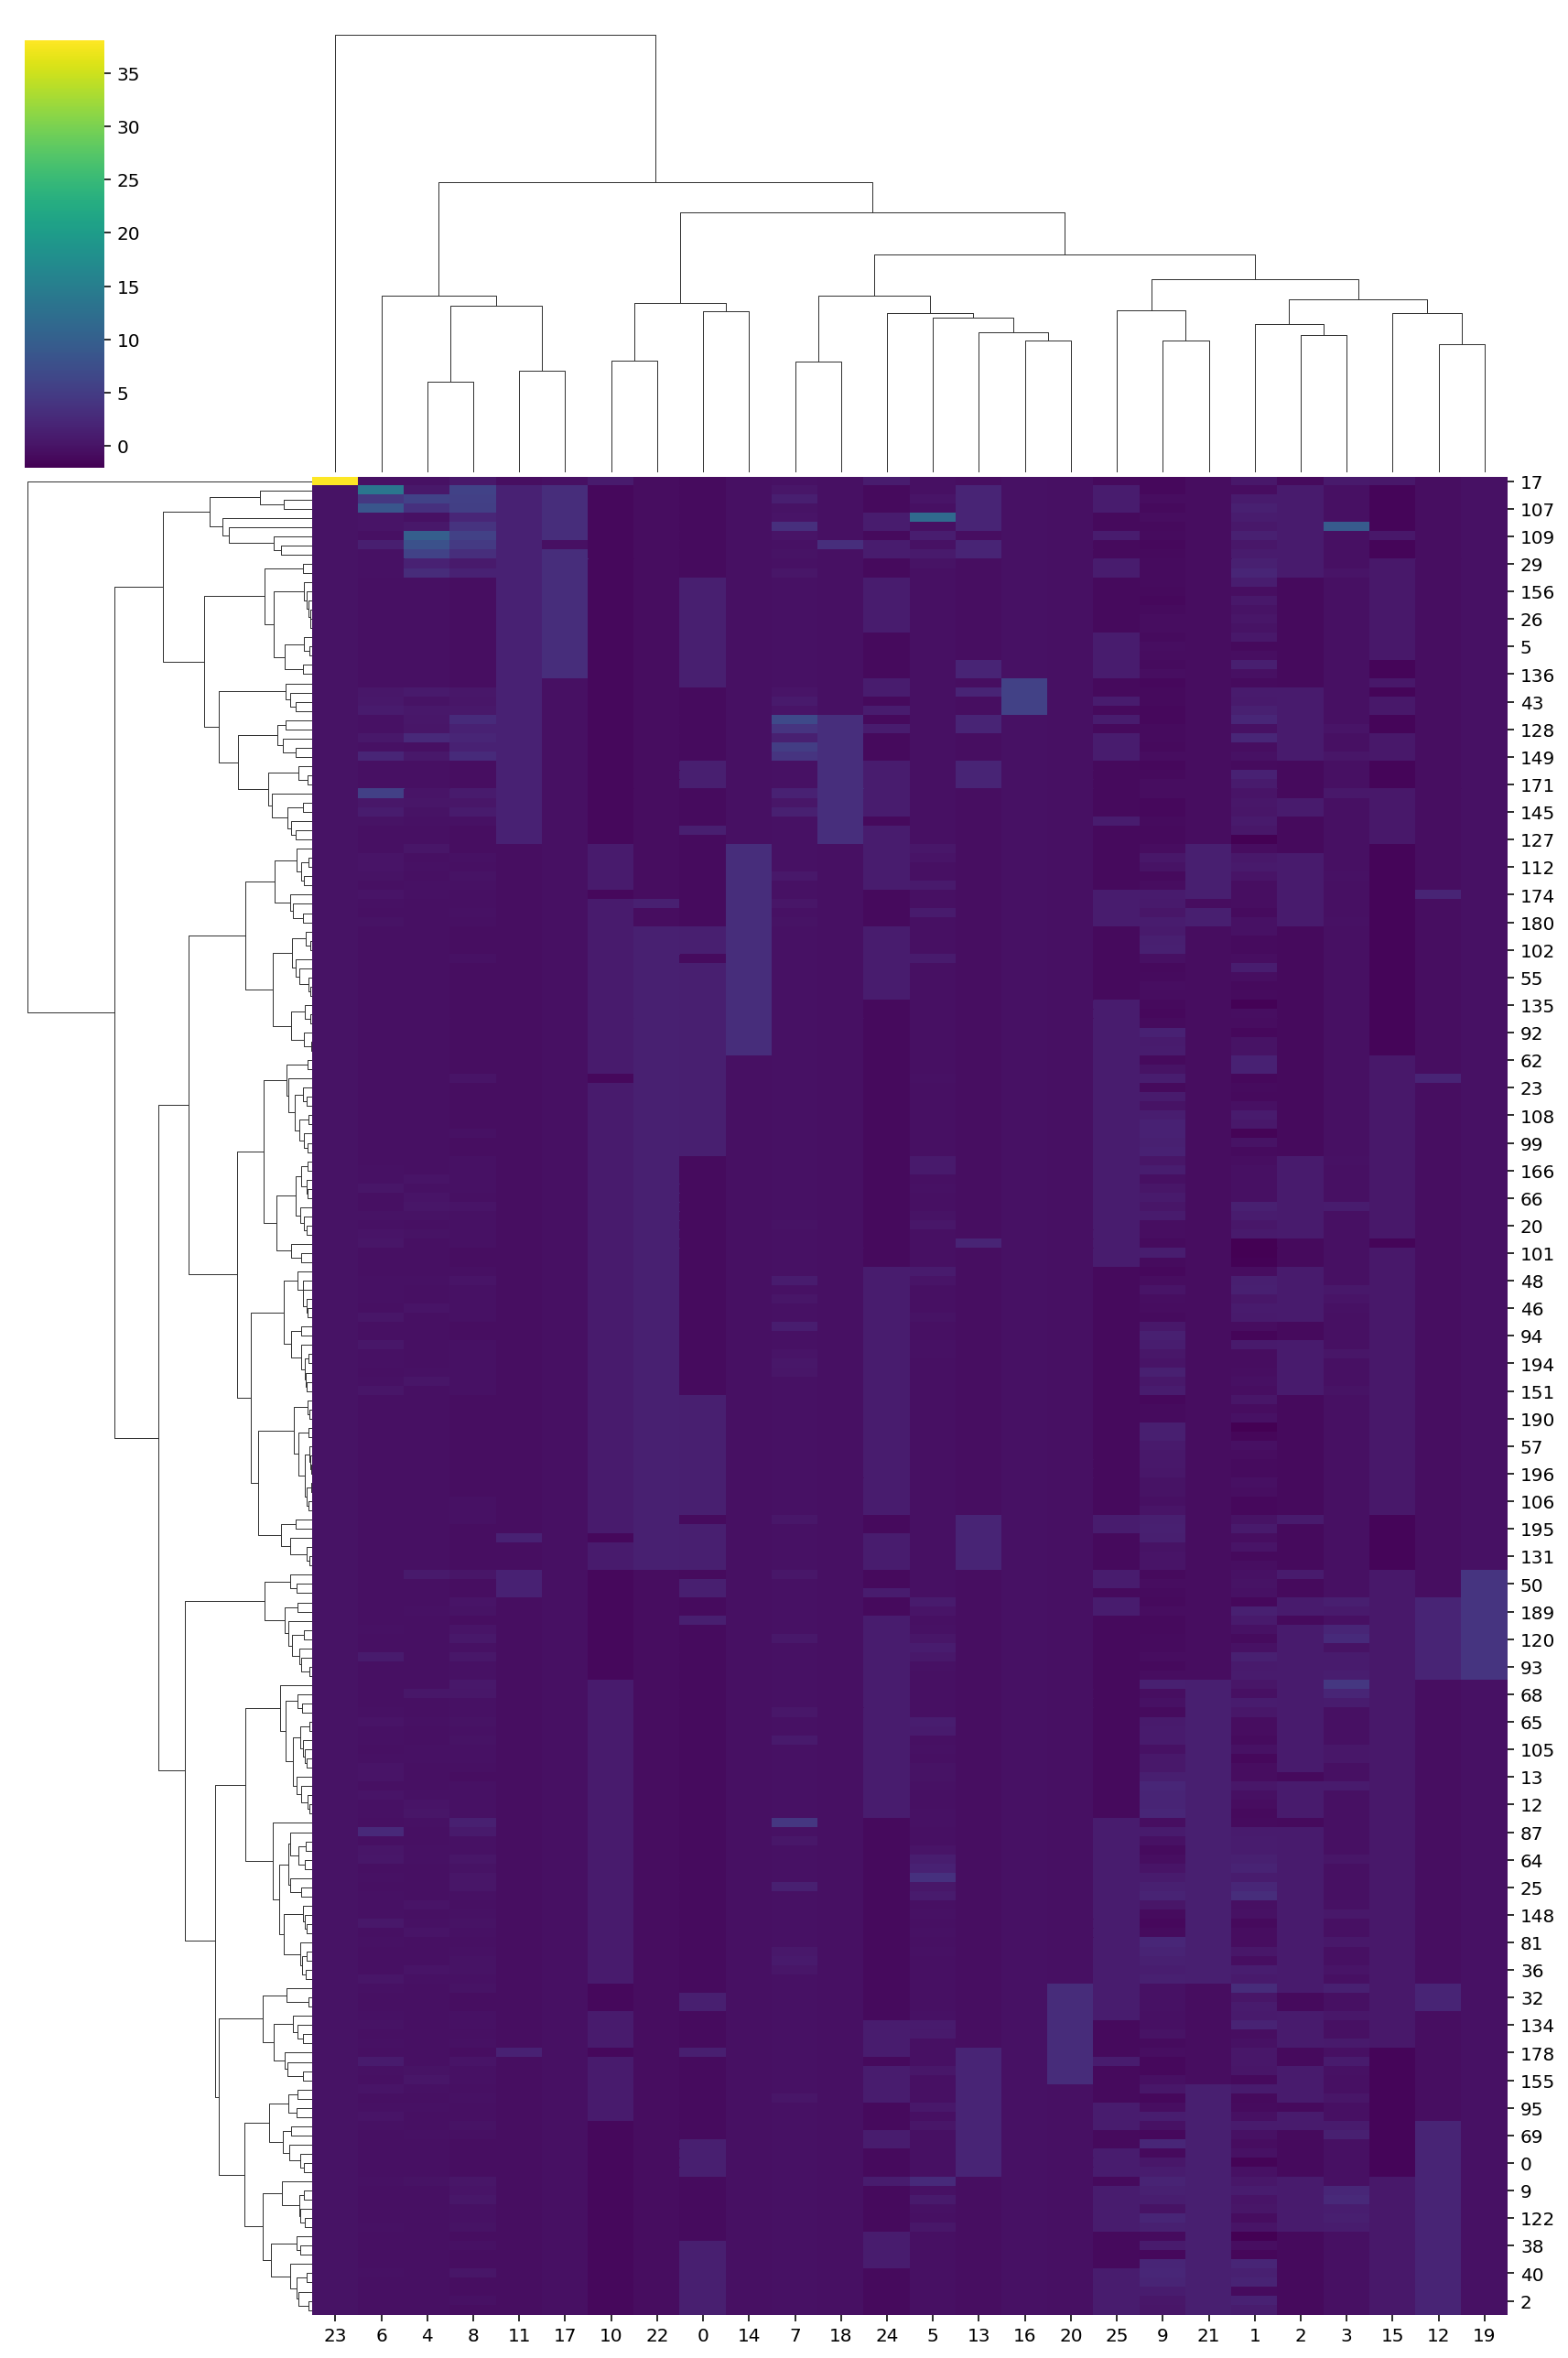

In [37]:
#using seaborn to see clearer
import seaborn as sns

sns.clustermap(X_train[:200, :], figsize=(12, 18), method=linkage_type, cmap='viridis')
plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

complete = AgglomerativeClustering(n_clusters=200, linkage='complete')
complete_pred = complete.fit_predict(X_train)

average = AgglomerativeClustering(n_clusters=200, linkage='average')
average_pred = average.fit_predict(X_train)

ward = AgglomerativeClustering(n_clusters=200)
ward_pred = ward.fit_predict(X_train)

complete_score = adjusted_rand_score(X_test.astype('int'), complete_pred)
average_score = adjusted_rand_score(X_test.astype('int'), average_pred)
ward_score = adjusted_rand_score(X_test.astype('int'), ward_pred)

print('Scores: \nWard:', ward_score, '\nAverage:', average_score, '\nComplete:', complete_score)

Scores: 
Ward: 0.005620149909457619 
Average: 0.02209900454370022 
Complete: 0.012579013957511162


Text(0.5, 1.0, 'Scree Plot')

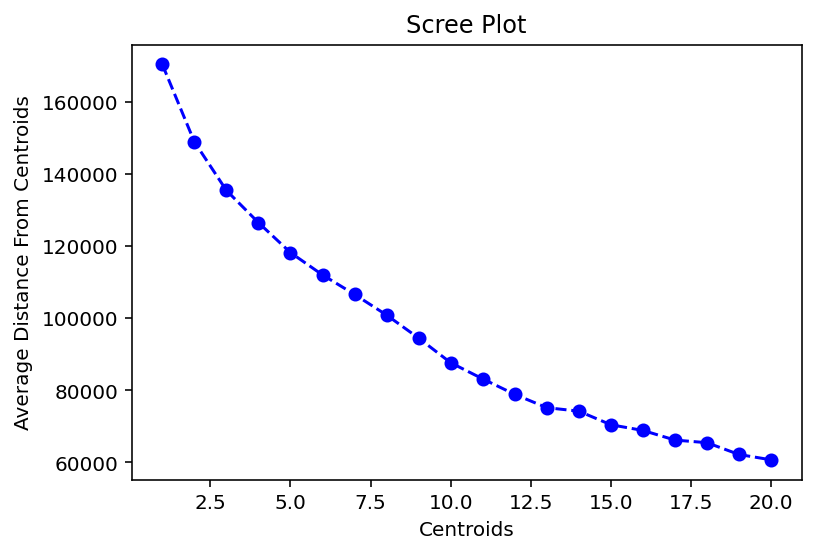

In [39]:
from sklearn.cluster import KMeans

def k_fit(k):
    scores = []
    for _ in range(1, k+1):
        kmeans_k = KMeans(_)
        kmeans_k.fit(X_train)
        scores.append(abs(kmeans_k.score(X_train)))
    return scores

k=20
scores = k_fit(k)
plt.plot(range(1,k+1), scores, '--', marker='o', color='b')
plt.xlabel('Centroids')
plt.ylabel('Average Distance From Centroids')
plt.title('Scree Plot')

In [40]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def train(models, X_train, X_test, n_estimators=None, min_samples_leaf=None):
    model_list = []
    for model in models:
        if model != AdaBoostClassifier and model != DecisionTreeClassifier:
            model = model(n_estimators=200, min_samples_leaf=3)
            model.fit(X_train, X_test)
            prediction = model.predict(y_train)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        elif model != DecisionTreeClassifier:
            rf = DecisionTreeClassifier(min_samples_leaf=3, max_depth=25)
            ada = model(base_estimator=rf, n_estimators=200)
            ada.fit(X_train, X_test)
            prediction = ada.predict(y_train)
            score = accuracy_score(prediction, y_test)
            model = ada
            print(model, score)
        else:
            tree = DecisionTreeClassifier(min_samples_leaf=3, max_depth=200)
            tree.fit(X_train, X_test)
            prediction = tree.predict(y_train)
            score = accuracy_score(prediction, y_test)
            model = tree
            print(model, score)
        model_list.append(model)
    return model_list
            
results = train([RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, DecisionTreeClassifier],
      X_train,
      X_test)

RandomForestClassifier(min_samples_leaf=3, n_estimators=200) 0.8146274149034038
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=25,
                                                         min_samples_leaf=3),
                   n_estimators=200) 0.7920883164673413
GradientBoostingClassifier(min_samples_leaf=3, n_estimators=200) 0.8206071757129715
DecisionTreeClassifier(max_depth=200, min_samples_leaf=3) 0.7562097516099356


In [41]:
#We could try adding clustered labels into data to see if that helps improvement
ward = AgglomerativeClustering(n_clusters=10)
X_ward_pred = ward.fit_predict(X_train)
X_ward_pred = scaler.fit_transform(X_ward_pred.reshape(-1,1))
X_added = np.hstack((X_train, ward_pred.reshape(-1,1)))


y_ward_pred = ward.fit_predict(y_train)
y_ward_pred = scaler.fit_transform(y_ward_pred.reshape(-1,1))
y_added = np.hstack((y_train, y_ward_pred.reshape(-1,1)))


t_added = ward.fit_predict(test)
t_added = scaler.fit_transform(t_added.reshape(-1,1))
t_added = np.hstack((test, t_added.reshape(-1,1)))


def train2(models, X_train, X_test, n_estimators=None, min_samples_leaf=None):
    model_list = []
    for model in models:
        if model != AdaBoostClassifier and model != DecisionTreeClassifier:
            model = model(n_estimators=200, min_samples_leaf=3, min_samples_split=2)
            model.fit(X_train, X_test)
            prediction = model.predict(y_added)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        elif model != DecisionTreeClassifier:
            rf = DecisionTreeClassifier(min_samples_leaf=3, max_depth=25)
            ada = model(base_estimator=rf, n_estimators=200)
            ada.fit(X_train, X_test)
            prediction = ada.predict(y_added)
            score = accuracy_score(prediction, y_test)
            model = ada
            print(model, score)
        else:
            tree = DecisionTreeClassifier(min_samples_leaf=3, max_depth=200)
            tree.fit(X_train, X_test)
            prediction = tree.predict(y_added)
            score = accuracy_score(prediction, y_test)
            model = tree
            print(model, score)
        model_list.append(model)
    return model_list
results2 = train2([RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, DecisionTreeClassifier],
      X_added,
      X_test)

RandomForestClassifier(min_samples_leaf=3, n_estimators=200) 0.8164673413063478
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=25,
                                                         min_samples_leaf=3),
                   n_estimators=200) 0.7617295308187673
GradientBoostingClassifier(min_samples_leaf=3, n_estimators=200) 0.7897884084636615
DecisionTreeClassifier(max_depth=200, min_samples_leaf=3) 0.5961361545538179


looks clustered labels are more effective

In [42]:
#Use grid search to find best parameters
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
parameters = {'n_estimators':[100, 150, 200],
              'min_samples_leaf': [3, 5, 7, 9]}

scorer = make_scorer(f1_score)
grid_obj = GridSearchCV(clf, scoring=scorer, param_grid=parameters)
print('done1')
grid_obj.fit(X_train, X_test.astype('int'))
print('done2')
best_clf = grid_obj.best_estimator_
best_clf.fit(X_train, X_test.astype('int'))
print('done3')
prediction = best_clf.predict(y_train)
print(accuracy_score(prediction, y_test.astype('int')), f1_score(prediction, y_test.astype('int')))

done1
done2
done3
0.8155473781048758 0.8179754879709487


In [43]:
rf_model = results[0]
np.savetxt('result.txt', rf_model.predict(test), fmt='%s')

In [44]:
np.savetxt('result2.txt', best_clf.predict(test), fmt='%s')

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

epochs = 10
model_list = []
scores = []
for e in range(epochs):
    X_train, y_train, X_test, y_test = train_test_split(X, labels, test_size = 0.25, shuffle=True)
    model = SVC()
    model.fit(X_train, X_test)
    prediction = model.predict(y_train)
    score = accuracy_score(prediction, y_test)
    scores.append(score)
    model_list.append(model)
    print(score, sep='\n')

0.8026678932842686
0.795768169273229
0.7934682612695492
0.8012879484820608
0.7911683532658693
0.7888684452621895
0.7948482060717571
0.7943882244710212
0.8003679852805887
0.7994480220791168


In [46]:
np.savetxt('result3.txt', model.predict(test), fmt='%s')

In [47]:
#Curious about how Xgboost performs
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=800, min_samples_leaf=2, max_depth=50, n_jobs=20)
model.fit(X_train, X_test)
prediction = model.predict(y_train)
score = accuracy_score(prediction, y_test)
print(model, score, sep='\n')

[02:06:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:06:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.30

In [48]:
np.savetxt('result4.txt', model.predict(test), fmt='%s')

In [49]:
# defining a voting function to optimize the prediction results
import collections
def optimize(models, test, t_added=None):
    """
    INPUT: model lists, test data, test data with clusterd labels
    OUTPUT: predicted values with most votes
    """
    table = np.zeros((len(models), len(test)))
    for i, m in enumerate(models):
        try:
            p = m.predict(test)
        except:
            p = m.predict(t_added)
        finally:
            table[i] = p
    vote0, vote1 = (table==0).sum(axis=0), (table==1).sum(axis=0)
    votes = np.vstack((vote0, vote1))
    predictions = np.argmax(votes, axis=0)
    return predictions

In [50]:
model_list = [results[0]] + [results[2]] + [results2[0]] + [results2[2]] + [best_clf] + model_list[:4]
predictions = optimize(model_list, test, t_added)
np.savetxt('emsemble.txt', predictions, fmt='%s')

Leaderboard score: 0.80640

In [51]:
predictions

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)